In [78]:
!wget https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/SegundoCorte/loan_approval_dataset.csv

--2025-04-30 22:13:14--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/SegundoCorte/loan_approval_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 384337 (375K) [text/plain]
Saving to: ‘loan_approval_dataset.csv.1’

loan_approval_datas 100%[===================>] 375.33K  --.-KB/s    in 0.03s   

2025-04-30 22:13:14 (13.1 MB/s) - ‘loan_approval_dataset.csv.1’ saved [384337/384337]



1) ¿Qué pasos seguirías para realizar un análisis exploratorio de los datos antes de construir un modelo de Machine Learning? Explica cada paso y menciona las herramientas que utilizarías.

RTA: 1) RECOLECCIÓN E INSPECCIÓN DE DATOS: Se importa el dataset y se observa su estructura general: número de filas y columnas, tipos de datos, primeras observaciones. 2) LIMPIEZA DE DATOS:Implica detectar y corregir datos faltantes, duplicados, valores atípicos o inconsistencias. 3) ANÁLISIS UNIVARIADO: Se analiza cada variable de forma individual para entender su distribución, tipo (categórica o numérica) y comportamiento. 4) ANÁLISIS BIVARIADO Y MULTIVARIADO: Se estudian relaciones entre variables. 5) VISUALIZACIÓN: Ayuda a detectar patrones, tendencias o anomalías mediante gráficos adecuados.

2) Imagina que uno de los datos contiene valores faltantes o atípicos (outliers). ¿Qué técnicas utilizarías para tratar con estos problemas en el conjunto de datos de la tabla? Justifica tu respuesta.

RTA: Si depronto la columna no es muy importante podría recurrir a una eliminación de dicha columna. Otra opción sería una imputación con medidas estadísticas, en donde se reemplazan dependiendo el caso con la media, mediana o moda; en este caso de imputación también podríamos usar los percentiles para poder rellenar esos campos.

La prioridad siempre es preservar la integridad y la representatividad de los datos sin introducir sesgos innecesarios.

3) En este caso, el objetivo es predecir si un cliente abandonara el banco (Exited) basandonos en sus caracterısticas. ¿Que tipo de modelo de clasificacion usarıas y por que? Discute las ventajas y desventajas de este modelo.

RTA: Random Forest, este modelo sirve ya que es robusto ante ruido y overfitting, y funciona bien cuando hay muchas variables o relaciones no lineales. VENTAJAS: Alta precisión, Robusto ante outlier y datos faltantes DESVENTAJAS: Menor interpretabilidad, Díficil ajuste

4) ¿Que es el desbalanceo de clases y por que es un problema al entrenar un modelo de clasificacion? ¿Que
tecnicas utilizarıas para abordar este problema, como SMOTE?

RTA: El desbalanceo de clases ocurre cuando las categorías de la variable objetivo (target)
no están representadas de forma equitativa en el conjunto de datos.
Es un problema porque tiene sesgos y el modelo ayuda a la clase mayoritaria, y mala generalización.
Técnicas como SMOTE, undersampling, o el uso de pesos ajustados ayudan a entrenar modelos que reconozcan con mayor precisión la clase minoritaria,
mejorando su valor predictivo y utilidad real.

5) ¿Que es el overfitting y como puedes detectarlo en un modelo de Machine Learning? Explica que medidas tomarıas para evitar el sobreajuste y mejorar la capacidad de generalizacion de tu modelo.

RTA: El overfitting es uno de los principales desafíos al construir modelos de Machine Learning. Detectarlo y corregirlo implica monitorear constantemente el rendimiento del modelo en datos de validación y aplicar técnicas como regularización, poda o validación cruzada para mejorar su capacidad de generalización y evitar que simplemente memorice los datos.

EJERCICIO 1: ANÁLISIS DESCRIPTIVO

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [80]:
df=pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [81]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [82]:
promedio1 = df[' income_annum'].mean()
promedio1

np.float64(5059123.9166081045)

In [83]:
df[' loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [84]:
average_cibil_approved = df[df[' loan_status'] == ' Approved'][' cibil_score'].mean()
print(f"The average CIBIL score for approved loans is: {average_cibil_approved}")

The average CIBIL score for approved loans is: 703.4619728915662


In [85]:
promedio2 = df[' loan_term'].mean()
promedio2

np.float64(10.900445069102835)

EJERCICIO 2: PREPROCESAMIENTO DE DATOS

In [86]:
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [88]:
print(df[df[" education"].isna()])

Empty DataFrame
Columns: [loan_id,  no_of_dependents,  education,  self_employed,  income_annum,  loan_amount,  loan_term,  cibil_score,  residential_assets_value,  commercial_assets_value,  luxury_assets_value,  bank_asset_value,  loan_status]
Index: []


In [89]:
df[" education"] = df[" education"].astype(str).str.strip().str.lower().map({
    "graduate": 1,
    "not graduate": 0
})
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,1,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,1,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,0,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,0,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,0,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [91]:
print(df[df[" self_employed"].isna()])

Empty DataFrame
Columns: [loan_id,  no_of_dependents,  education,  self_employed,  income_annum,  loan_amount,  loan_term,  cibil_score,  residential_assets_value,  commercial_assets_value,  luxury_assets_value,  bank_asset_value,  loan_status]
Index: []


In [92]:
df[" self_employed"] = df[" self_employed"].astype(str).str.strip().str.lower().map({
    "yes": 1,
    "no": 0
})
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


EJERCICIO 3: ANÁLISIS DE CORRELACIÓN

In [93]:
correlation_I_L = df[' income_annum'].corr(df[' loan_amount'])
correlation_I_L

np.float64(0.9274699109871487)

In [95]:
correlation_C_L = df[' cibil_score'].corr(df[' loan_amount'])
correlation_C_L

np.float64(-0.017034787023534392)

In [96]:
correlation_R_C = df[' residential_assets_value'].corr(df[' commercial_assets_value'])
correlation_R_C

np.float64(0.41478602657549807)

C1 (0.9274699109871487): Representa una correlación positiva muy fuerte. Significa que a medida que una variable aumenta, la otra también tiende a aumentar fuertemente.

C2 (-0.017034787023534392): Es una correlación negativa muy débil. Sugiere una ligera tendencia a que una variable disminuya cuando la otra aumenta, pero la relación es prácticamente insignificante.

C3 (0.41478602657549807): Representa una correlación positiva moderada. Indica una tendencia a que ambas variables aumenten juntas, aunque no tan fuertemente como en C1.

En el análisis se identificó una correlación positiva muy fuerte (C1 = 0.93), lo cual indica que las variables involucradas están altamente relacionadas y podrían aportar información redundante al modelo. Esta fuerte correlación, conocida como multicolinealidad, puede generar problemas como coeficientes inestables, mayor varianza en las estimaciones, dificultad para interpretar la importancia de cada variable y riesgo de sobreajuste, afectando negativamente la capacidad de generalización del modelo.

EJERCICIO 4: COMPARACIÓN DE MODELOS DE CLASIFICACIÓN

In [99]:
Distribución=df[' loan_status'].value_counts(normalize=True)

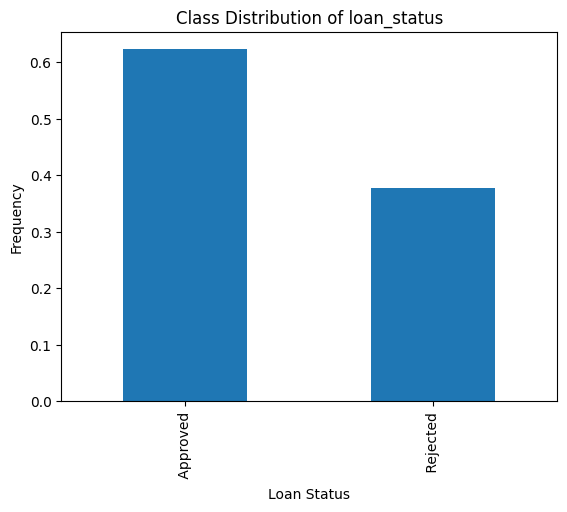

In [100]:
import matplotlib.pyplot as plt

Distribución.plot(kind='bar')
plt.title('Class Distribution of loan_status')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.show()

In [146]:
x = df[[' income_annum', ' loan_amount', " residential_assets_value", " bank_asset_value"]]
y = df[' loan_status']

In [147]:
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [148]:
from imblearn.over_sampling import SMOTE
if y_train.value_counts(normalize=True).max() > 0.60:
    print("Aplicando SMOTE para balancear el conjunto de entrenamiento...")
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(x_train, y_train)
    print("Nueva distribución de clases:")
    print(pd.Series(y_train).value_counts(normalize=True))

Aplicando SMOTE para balancear el conjunto de entrenamiento...
Nueva distribución de clases:
 loan_status
Rejected    0.5
Approved    0.5
Name: proportion, dtype: float64


In [149]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [150]:
lr_model = LogisticRegression(max_iter=10000, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [151]:
y_pred_dt = dt_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

print("Reporte de Clasificación - Árbol de Decisión (Test):")
print(classification_report(y_test, y_pred_dt))

print("Reporte de Clasificación - Regresión Logística (Test):")
print(classification_report(y_test, y_pred_lr))

Reporte de Clasificación - Árbol de Decisión (Test):
              precision    recall  f1-score   support

    Approved       0.61      0.58      0.60       531
    Rejected       0.36      0.40      0.38       323

    accuracy                           0.51       854
   macro avg       0.49      0.49      0.49       854
weighted avg       0.52      0.51      0.51       854

Reporte de Clasificación - Regresión Logística (Test):
              precision    recall  f1-score   support

    Approved       0.66      0.54      0.60       531
    Rejected       0.42      0.54      0.48       323

    accuracy                           0.54       854
   macro avg       0.54      0.54      0.54       854
weighted avg       0.57      0.54      0.55       854



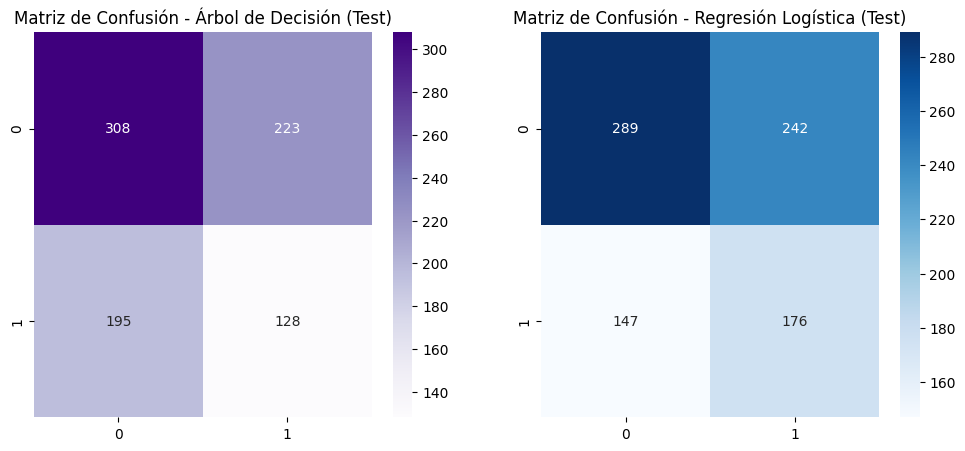

In [152]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', ax=ax[0], cmap='Purples')
ax[0].set_title("Matriz de Confusión - Árbol de Decisión (Test)")
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', ax=ax[1], cmap='Blues')
ax[1].set_title("Matriz de Confusión - Regresión Logística (Test)")
plt.show()

In [153]:
y_pred_train_dt = dt_model.predict(X_train)
y_pred_train_lr = lr_model.predict(X_train)

print("Reporte de Clasificación - Árbol de Decisión (Train):")
print(classification_report(y_train, y_pred_train_dt))

print("Reporte de Clasificación - Regresión Logística (Train):")
print(classification_report(y_train, y_pred_train_lr))

Reporte de Clasificación - Árbol de Decisión (Train):
              precision    recall  f1-score   support

    Approved       1.00      1.00      1.00      2125
    Rejected       1.00      1.00      1.00      2125

    accuracy                           1.00      4250
   macro avg       1.00      1.00      1.00      4250
weighted avg       1.00      1.00      1.00      4250

Reporte de Clasificación - Regresión Logística (Train):
              precision    recall  f1-score   support

    Approved       0.56      0.52      0.54      2125
    Rejected       0.55      0.59      0.57      2125

    accuracy                           0.55      4250
   macro avg       0.55      0.55      0.55      4250
weighted avg       0.55      0.55      0.55      4250



In [154]:
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

In [155]:
fpr_dt, tpr_dt, _ = roc_curve(y_test.map({' Approved': 1, ' Rejected': 0}), y_prob_dt)
fpr_lr, tpr_lr, _ = roc_curve(y_test.map({' Approved': 1, ' Rejected': 0}), y_prob_lr)
auc_dt = auc(fpr_dt, tpr_dt)
auc_lr = auc(fpr_lr, tpr_lr)

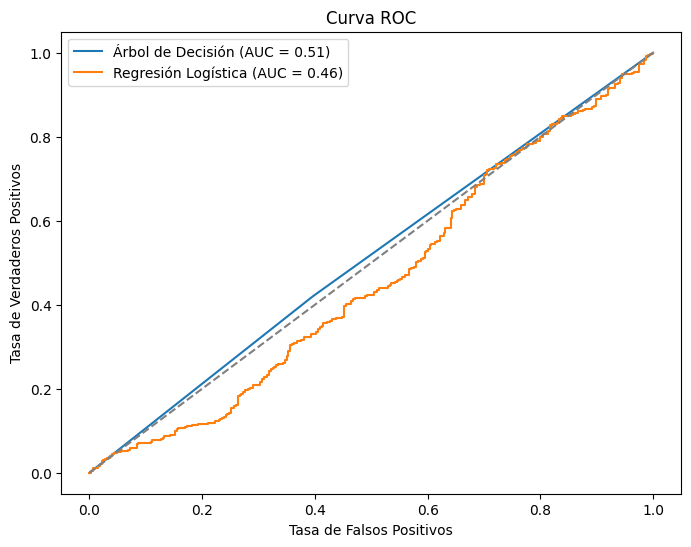

In [156]:
plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label=f"Árbol de Decisión (AUC = {auc_dt:.2f})")
plt.plot(fpr_lr, tpr_lr, label=f"Regresión Logística (AUC = {auc_lr:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

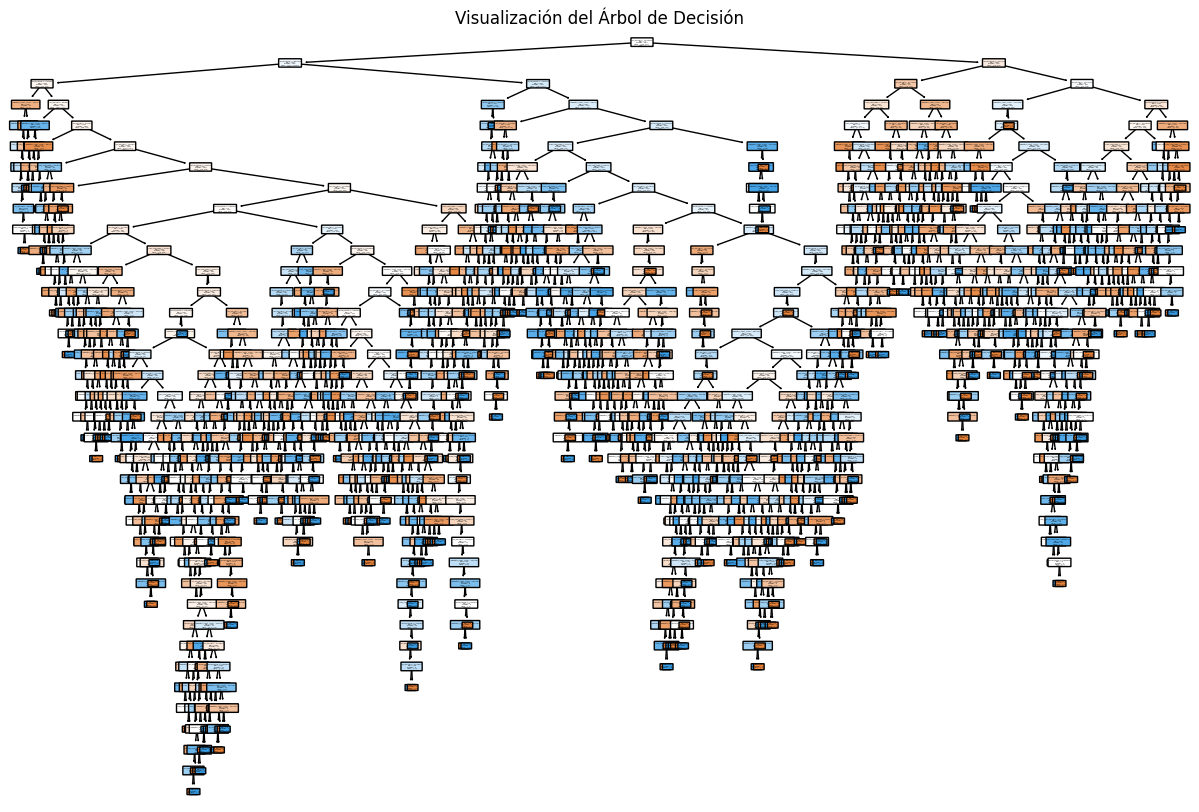

In [157]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(dt_model, feature_names=x.columns, class_names=["0", "1"], filled=True, rounded=True)
plt.title("Visualización del Árbol de Decisión")
plt.show()

In [158]:
dt_model_pruned = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [159]:
y_pred_pruned = dt_model_pruned.predict(X_test)
y_pred_train_pruned = dt_model_pruned.predict(X_train)

print("Reporte de Clasificación - Árbol de Decisión (Train):")
print(classification_report(y_train, y_pred_train_pruned))

Reporte de Clasificación - Árbol de Decisión (Train):
              precision    recall  f1-score   support

    Approved       0.57      0.58      0.57      2125
    Rejected       0.57      0.56      0.57      2125

    accuracy                           0.57      4250
   macro avg       0.57      0.57      0.57      4250
weighted avg       0.57      0.57      0.57      4250



In [160]:
print(classification_report(y_test, y_pred_pruned))
print(confusion_matrix(y_test, y_pred_pruned))

              precision    recall  f1-score   support

    Approved       0.65      0.54      0.59       531
    Rejected       0.41      0.52      0.46       323

    accuracy                           0.53       854
   macro avg       0.53      0.53      0.52       854
weighted avg       0.56      0.53      0.54       854

[[287 244]
 [155 168]]


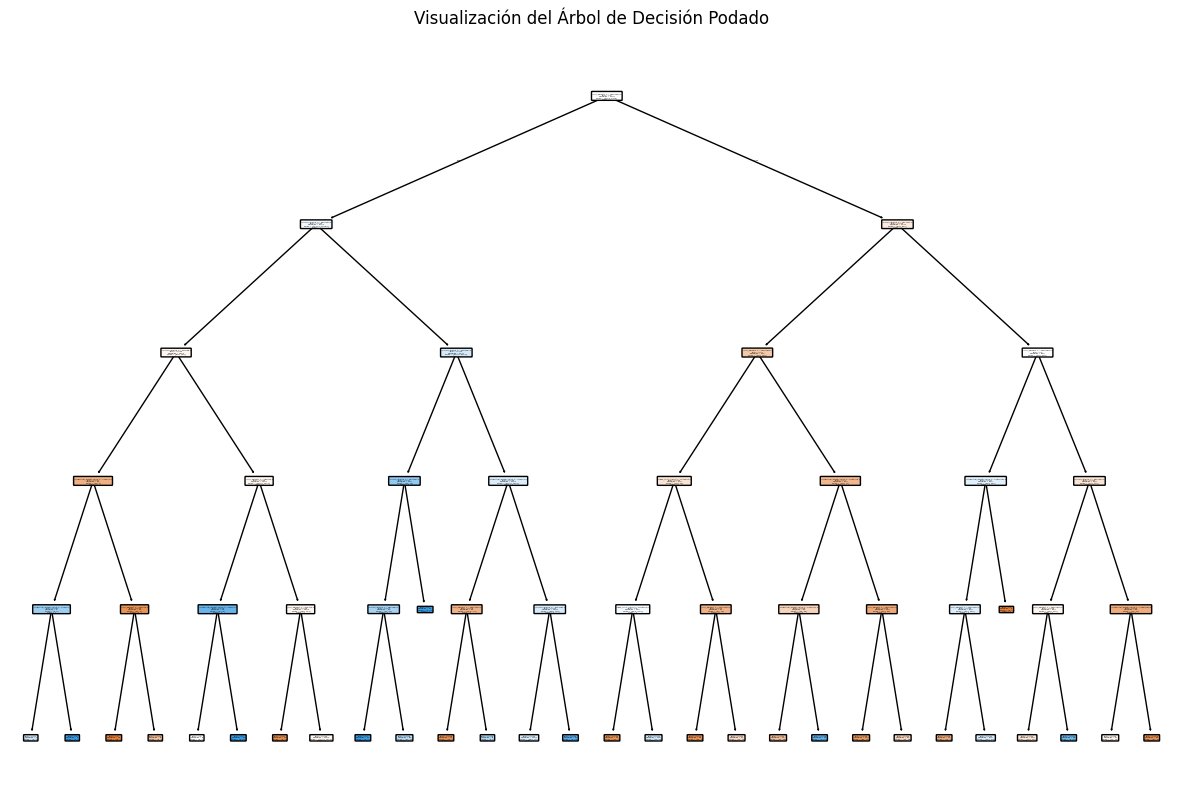

In [161]:
plt.figure(figsize=(15, 10))
plot_tree(dt_model_pruned, feature_names=x.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.title("Visualización del Árbol de Decisión Podado")
plt.show()